In [1]:
import numpy as np
from numpy import vstack, array, nan
from sklearn.preprocessing import Imputer
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target

print(data.shape)

(150, 4)


In [2]:
data[:3]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

In [4]:
data.std(axis=0)

array([ 0.82530129,  0.43214658,  1.75852918,  0.76061262])

In [3]:
#data中各列的方差
np.var(data,axis=0)

array([ 0.68112222,  0.18675067,  3.09242489,  0.57853156])

# Filter法

In [5]:
# 方差选择法，计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征

from sklearn.feature_selection import VarianceThreshold
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
VarianceThreshold_data=VarianceThreshold(threshold=0.6).fit_transform(data) 
VarianceThreshold_data[:3]
#（方差大于0.6）

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3]])

In [9]:
# 相关系数法：计算各特征对目标值的相关系数以及相关系数的P值

from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数

SelectKBest(lambda X, Y: array((lambda X:pearsonr(X, Y), X.T)).T, k=2).fit_transform(data,target)

SyntaxError: invalid syntax (<ipython-input-9-cc9e31079706>, line 9)

In [11]:
pearsonr(data[:,1], target)

(-0.41944620026002749, 9.1599849725500019e-08)

In [12]:
#卡方检验
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#选择K个最好的特征，返回选择特征后的数据
SelectKBest_chi2=SelectKBest(chi2,k=2).fit_transform(data,target)
SelectKBest_chi2[:3]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2]])

In [ ]:
#互信息法：定性自变量对定性因变量的相关性

from sklearn.feature_selection import SelectKBest
from minepy import MINE

#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

#选择K个最好的特征，返回特征选择后的数据
SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)


互信息计算计算公式
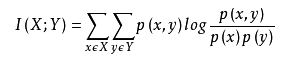

# Wrapper 包装法

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data1=StandardScaler().fit_transform(data)
print(data1[:3])
print('_'*30)

RFE_feature_stand=RFE(estimator=LogisticRegression(),n_features_to_select=2).fit_transform(data1,target)#留下几个特征n_features_to_select
print('RFE_Standardscaler\n',RFE_feature_stand[:3])

print('_'*30)
data2=MinMaxScaler().fit_transform(data)
print(data2[:3])

RFE_feature_minmax=RFE(estimator=LogisticRegression(),n_features_to_select=2).fit_transform(data2,target)
print('RFE_feature_minmax\n',RFE_feature_minmax[:3])


[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]
______________________________
RFE_Standardscaler
 [[-1.3412724  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.39813811 -1.31297673]]
______________________________
[[ 0.22222222  0.625       0.06779661  0.04166667]
 [ 0.16666667  0.41666667  0.06779661  0.04166667]
 [ 0.11111111  0.5         0.05084746  0.04166667]]
RFE_feature_minmax
 [[ 0.06779661  0.04166667]
 [ 0.06779661  0.04166667]
 [ 0.05084746  0.04166667]]


# Embedded 算法

In [19]:
# 基于惩罚项的特征选择法：　使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
print(data[:3])
selectfromodel=SelectFromModel(estimator=LogisticRegression(penalty='l1',C=0.1)).fit_transform(data,target)
selectfromodel[:3]

#L1惩罚项降维的原理在于保留多个对目标值具有同等相关性的特征中的一个，
#所以没选到的特征不代表不重要。故，可结合L2惩罚项来优化。

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


array([[ 5.1,  3.5,  1.4],
       [ 4.9,  3. ,  1.4],
       [ 4.7,  3.2,  1.3]])

In [20]:
print(data[:3])
selectfromodel2=SelectFromModel(estimator=LogisticRegression(penalty='l2',C=0.1)).fit_transform(data,target)
selectfromodel2[:3]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


array([[ 3.5,  1.4],
       [ 3. ,  1.4],
       [ 3.2,  1.3]])

In [22]:

print(data[:3])
selectfromodel2=SelectFromModel(estimator=LogisticRegression(penalty='l2',C=0.1)).fit_transform(data,target)
selectfromodel2[:3]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


array([[ 3.5,  1.4],
       [ 3. ,  1.4],
       [ 3.2,  1.3]])

In [23]:
#基于树模型的特征选择法
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
print(data[:3])
GBDT_feature=SelectFromModel(GradientBoostingClassifier(),threshold=None).fit_transform(data,target)
print(GBDT_feature[:3])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]]


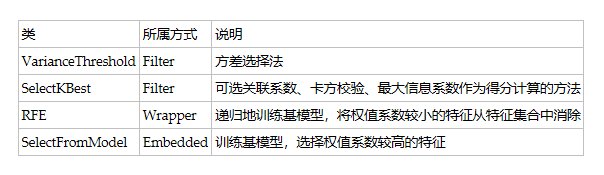

# PCA

In [32]:
from sklearn.decomposition import PCA
#主成分分析法:让映射后的样本具有最大的发散性，返回降维后的数据
#参数n_components为主成分数目

pca=PCA(n_components=2).fit_transform(data)
pca[:3]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

In [33]:
pca1=PCA(n_components=1).fit_transform(data)
pca1[:3]

array([[-2.68420713],
       [-2.71539062],
       [-2.88981954]])

In [35]:
lr=LogisticRegression().fit(pca1,target)

In [36]:
lr.predict(pca1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# LDA

In [103]:
#LDA 让映射后的样本有最好的分类，属于有监督学习，可以进行分类
from sklearn.lda import LDA
lda=LDA(n_components=2).fit_transform(data,target)
lda[:3]

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326],
       [-7.51137789, -0.23807832]])

In [104]:
lda=LDA(n_components=3).fit(data,target)